<a href="https://colab.research.google.com/github/love-bees/dataHacker/blob/master/LDA_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Discriminant Analysis (LDA)

## Classification

Imagine that we have two classes of data whose elements are represented by stars and triangles like in the image below. The purpose of machine learning is to determine a function (black line in the image) which would divide these two groups of elements in an optimal way. When a new element appears and we want to figure out which group it belongs to, the algorithm should be able to recognize which side of the line would be the best fit. This is how an element with an unknown class gets classified. The simplest form of this function is a linear function (for example the linear equation).

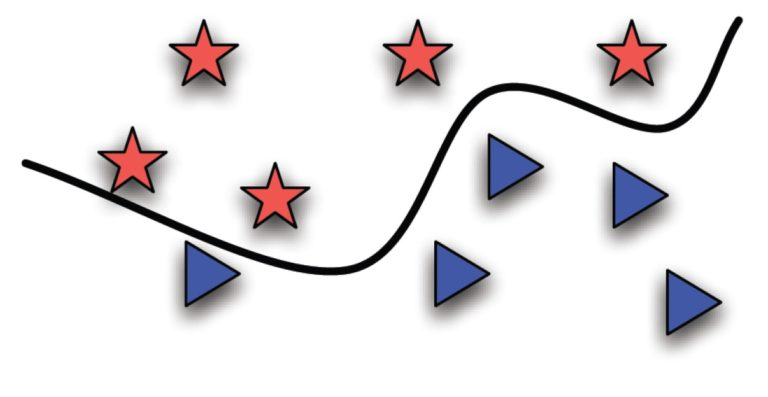

As you might have noticed already in the example above, we wouldn't be able to use a linear equation to separate the group of stars from the group of triangles. A problem like this is **linearely unseparable**.

Let's look at an example of two groups of points which are **linearly separable**. This is very easy to illustrate using Python:

In [0]:
# Importing libraries

import numpy as np
import matplotlib.pyplot as plt

In [0]:
# Defining a toy dataset example
# X is the group of data points which we use for training
# Each element in this group is made up of two dimensional vectors

X = np.array([[-1,-1],[-2,-1],[-3,-2],[1, 1],[2,1],[3,2]])

In [3]:
# Checking the type and dimension of X

print(type(X))
print(X.shape)

<class 'numpy.ndarray'>
(6, 2)


To sum things up, we made a matrix X with 6 rows (horizontally) and 2 columns (vertically). The next important thing to look into is how we can access the elements of the matrix. In this example we need to define two coordinates to be able to access them. The horizontal coordinate is the axis-0 while the vertical is axis-1 in Python. Indexing starts at zero and in the next picture we can see how we're able to access specific elements.

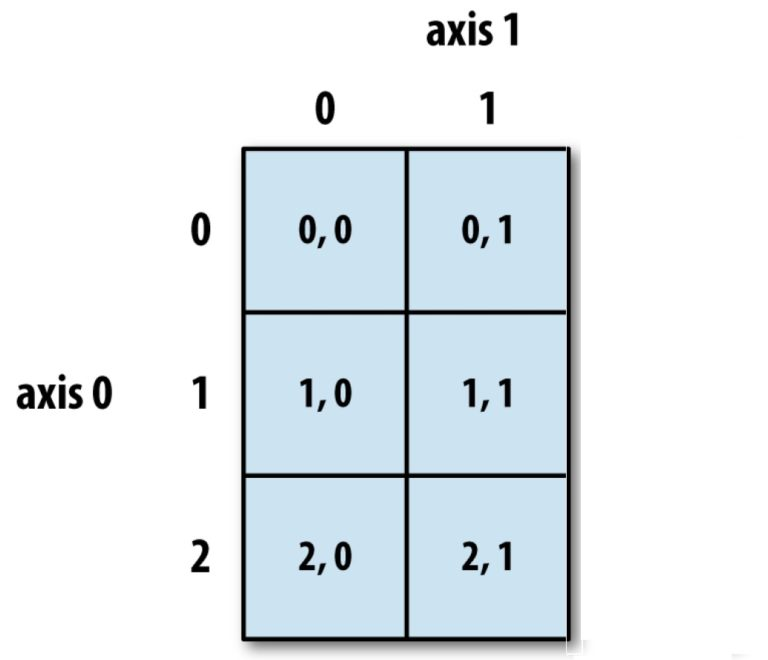

From that, we can conclude that `X[0,0]` will be the first element in the top left-hand corner, while the element `X[0,1]` will be the first in the top right-hand corner.

Using the command `X[:,0]` we can select the whole first column, while using the command `X[:,1]` we will select the whole second column.

Using these sequences we are able to find our coordinates (in the picture the first is horizontal while the second is vertical). In this example we will use the command scatter, which draws out the data in the exact coordinates without connecting them.

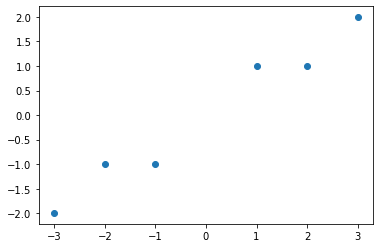

In [4]:
plt.scatter(X[:,0], X[:,1])

This super simple set is linearly separable and is made up of two classes (positive and negative coordinates) with three elements each. Let's define a straight line which will separate these two sets of points into two classes.

Remembering what we learned from linear algebra, it should look something like this:

$x_2 = kx_1+n$

If we take k to be -1 and n to be 1, we will get an equation that looks like this:

$x_2 = -x_1+1$

One way to draw this line in Python is to define some values for our variable $x_1$ and then to calculate $x_2$ based on that.

Since we're working with sequences, we can draw both since they're the same length. We can accomplish that with the following commands:

In [0]:
# Creating a function for separating the data

x1_fit = np.linspace(-3,3,50)
x2_fit = -1.0*x1_fit+1

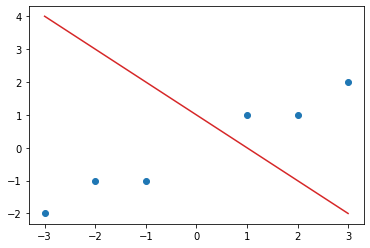

In [6]:
# Plotting the function along with the dataset

plt.scatter(X[:,0],X[:,1])
plt.plot(x1_fit, x2_fit, color='C3');

The new red line that we just plotted divides our data into two parts, but intuitively it's obvious that it's not made to be optimal.
Next, we can test the values of our function:

$x_2=–x_1+1$

which we can now write in the following form:

$x_1+x_2–1=0$

which is actually in the form of a function: $f(x1,x2)=x1+x2−1$ and using that we can define if a random point belongs to class 1 or class 2.

For example, let's take the point with coordinates $(1,1)$ and see what we get when we put it through our function: $f(1,1) = 1+1-1=1>0$. This point will be above the line, which is illustrated in the picture, and will belong to class 1.

For points under this line, the value of the function will be less than zero. For example: $f(-2,-1)=-2-1-1=-4$

Now we're getting to the basic idea of machine learning. For a new point, for example with coordinates $(2,0)$ we will calculate the value of the function $f(x_1,x_2)$. This value is: $f(2,0)=2+0-1=1>0$ and this point belongs to class 1.

This is the essence of machine learning. The parameters of the function need to be calculated, in this case the parameters were $k$ and $n$. New data is used to calculate the values of the function and we get classification by observing this value and seeing if it's greater than or less than zero.

Our simple example is the basis of many other sophisticated and complicated systems for classification.

Let's observe what is learned here, or why do we call it Machine Learning. We "learned" the parameters $k$ and $n$ and in that way got our decision boundary function. Here we got the parametes by hand, and now we'll see how some algorithms can help to determine these parameters automatically and in an optimal way with respect to some criteria function.

## Linear Discriminant Analysis

In the previous example we had to define coeficients of our line, which was simple because the problem was linearly separable and had only 6 elements. Linear Discriminat Analysis (shortened to LDA) is an algorythm which determines the coeficients $k$ and $n$ of our line. The line will be placed in such a way that the centers of our two classes are as far away as possible from this line.

For a defined set of data points X, we need to determine which class it belongs to. In this problem we have two classes to consider, and we can numerically label them as 1 and 2. Since the dataset is made up of 6 elements, we need to define a vector (NumPy array) such that the first three elements belong to class 1, and the other 3 elements belong to class 2.

In [0]:
# Vector y determines which class each elements belongs to
# First three belong to class 1
# Last three belong to class 2

y = np.array([1, 1, 1, 2, 2, 2])

Vector y determmines which class each element belongs to, and when we have this information we can classify elements. This represents supervised learning. In case we don't have the information about which class our elements belong to, we use a different set of algorithms and we use clustering. We will use the library on which most of the algorithms we need will be based on, which is `sklearn`.

In [0]:
# Library sklearn is one of the most popular libraries for Machine Learning
# In it we have the LDA algorythm

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [0]:
# clf - variable in which we store the LDA classifier

clf = LinearDiscriminantAnalysis()

In [11]:
# training the classifier

clf.fit(X,y)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [19]:
print(X.shape)
print(y.shape)

(6, 2)
(6,)


`clf` is now our object in which the parameters for our classifier are stored. The first and most important method is the command `.fit(X,y)`. Using this command we forward the data X to our object clf as a vector with a class y. The output from `out[12]` doesn't need to be analyzed as of now.

Using the command `.fit()` we forwarded the parameters of our linear classifier. Now we can test it on new elements that we haven't used before.

In [23]:
# testiranje klasifikatora

x1_test = np.array([[-2, -3]])
clf.predict(x1_test)

array([1])

For the data point $(-2, -3)$ we got the result that it belongs to class 1. The result is an array with one element whose value is 1.

In the next part we will test our LDA classifier for points $(3, 3)$ and $(-2, 2)$.

In [25]:
x2_test = np.array([[3,3]])
clf.predict(x2_test)

array([2])

In [26]:
x3_test = np.array([[-2,2]])
clf.predict(x3_test)

array([2])

In [27]:
clf.intercept_

array([0.])

In [34]:
clf.coef_

array([[-3.0767403e-15,  8.0000000e+00]])

The points that we tested can be displayed on a new graph.

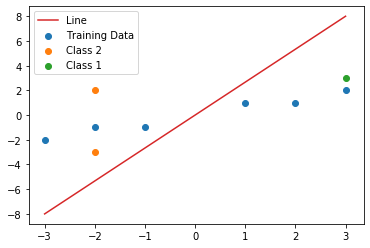

In [49]:
# plotting the dataset along with the new points

plt.scatter(X[:,0], X[:,1])
plt.scatter(x1_test[0,0], x1_test[0,1], c='C1')
plt.scatter(x2_test[0,0], x2_test[0,1], c=u'C2')
plt.scatter(x3_test[0,0], x3_test[0,1], c=u'C1');
plt.plot(np.linspace(-3,3), np.linspace(-1,1)*float(clf.coef_[0][1])+float(clf.coef_[0][0]), color='C3')
plt.legend(['Line', 'Training Data', 'Class 2', 'Class 1'])